#**2. Telecom Customer Churn Prediction**

**Business Problem Statement:**

"A telecom company wants to predict which customers are likely to leave (churn) their service in the near future. Losing customers is costly because acquiring new ones is more expensive than retaining existing ones. By predicting churn, the company can take proactive actions—like offering discounts or better support—to retain customers and reduce revenue loss."



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


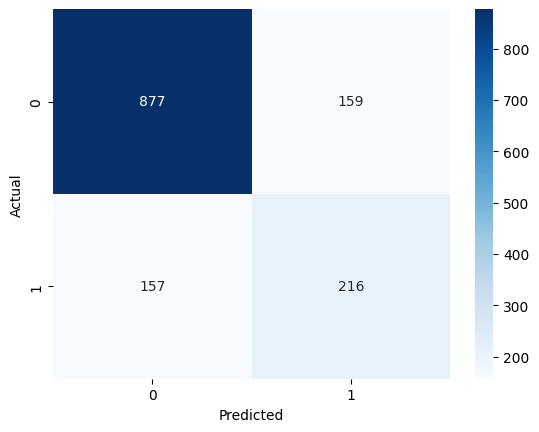

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1036
           1       0.58      0.58      0.58       373

    accuracy                           0.78      1409
   macro avg       0.71      0.71      0.71      1409
weighted avg       0.78      0.78      0.78      1409



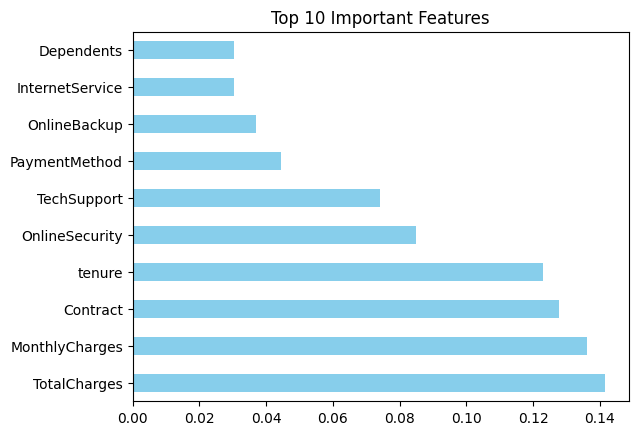

In [ ]:
# **Step 1: Import Libraries**
# pandas, numpy → data manipulation
# matplotlib, seaborn → visualization
# sklearn → model building & evaluation
# imblearn.SMOTE → handle class imbalance

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE# 🔹 Added

import warnings
warnings.filterwarnings('ignore')

# **Step 2: Load Dataset**
# Read CSV file directly
df = pd.read_csv("Telco_Cusomer_Churn.csv")
df.head(5)

# **Step 3: Explore Data**
# Check structure, datatypes, missing values
# Visualize target distribution
df.info()
df.describe()
df.isnull().sum()
df['Churn'].value_counts()


# **Step 4: Data Cleaning
# Drop customerID column (not useful)
# Convert TotalCharges to numeric & fill missing values
#Handle Missing Values & Encode Categorical Variables**
df.drop('customerID', axis = 1, inplace=True)

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'].str.strip(), errors = 'coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

print(df['TotalCharges'].dtype)

# Encode categorical columns
# Encode object columns except the target
for col in df.select_dtypes(include = 'object').columns:
   if col != 'Churn':
       df[col] = LabelEncoder().fit_transform(df[col])

# Encode target variable (Yes → 1, No → 0)
df['Churn'] = df['Churn'].map({'Yes':1, 'No':0})   # 🔹 made Yes=1, No=0

# Train/Test Split
# Split features and target
# Split into training (80%) and testing (20%)
X = df.drop('Churn', axis = 1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state = 42)

# **Step 5: Handle Imbalance with SMOTE**
# Display class distribution before SMOTE
# Apply SMOTE on training data only
# Verify balance after resampling
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:\n", y_train.value_counts())  # 🔹 check balance

# **Step 6: Feature Scaling (Optional for RF)**
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Step 7: Train a Model**
# Initialize and train Random Forest Classifier
model = RandomForestClassifier(n_estimators = 100, random_state =42)
model.fit(X_train, y_train)

# Predict
# Predict on test set
y_pred = model.predict(X_test)

# **Step 8: Evaluate Model**
# Accuracy, confusion matrix, classification report
print('Accuracy:', accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cm)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(classification_report(y_test, y_pred))

# **Step 9: Feature Importance (Added)**
# Plot top 10 features affecting churn
# Print top 5 influential features
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh', color="skyblue")
plt.title("Top 10 Important Features")
plt.show()

**Project Summary**

Built a Random Forest model to predict telecom customer churn.

Handled class imbalance using SMOTE for better churn detection.

Performed feature scaling, model training, and evaluation with accuracy, precision, recall, and F1-score.

Identified top features influencing churn: tenure, contract type, and total charges.

Compared with Logistic Regression to analyze trade-offs between recall and accuracy.



**Project Overview**
Predicting telecom customer churn using Random Forest with Python. This project demonstrates an end-to-end machine learning pipeline, including data preprocessing, handling imbalance, model training, evaluation, and feature importance analysis.

**Dataset**

**Source:** Kaggle – Telecom Customer Churn Dataset

~7,000 customer records with features like tenure, contract type, total charges, etc.

**Target:** Churn (Yes/No)


**Steps Performed**

1. Data Exploration & Cleaning – Handled missing values; encoded categorical variables.

2. Class Imbalance Handling – Used SMOTE to balance churn vs non-churn.

3. Feature Scaling – Applied StandardScaler.

4. Model Training – Trained Random Forest Classifier; Logistic Regression used for comparison.

5. Evaluation – Analyzed accuracy, precision, recall, F1-score, and confusion matrix.

6. Feature Importance – Identified top features influencing churn (e.g., tenure, contract type, total charges).

**Insights**

- Tenure, contract type, and total charges are the most influential factors in customer churn.

- Handling class imbalance improves the model’s ability to detect churners.

- Random Forest provides a good balance of performance and interpretability for business decisions.